# 1. **Practice Project: Insurance Cost Analysis**

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will develop models for predicting the `charges`

# Setup


### Importing Required Libraries
_I recommend you import all required libraries in one place (here):_

In [422]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
...

Ellipsis

#  Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file.

Print the first 10 rows of the dataframe to confirm successful loading.

In [423]:
# Start here
file_path = 'medical_insurance_dataset.csv'

df = pd.read_csv(file_path, header = 0)
print(df.head())

   19  1    27.9  0 1.1  3    16884.924
0  18  2  33.770  1   0  4   1725.55230
1  28  2  33.000  3   0  4   4449.46200
2  33  2  22.705  0   0  1  21984.47061
3  32  2  28.880  0   0  1   3866.85520
4  31  1  25.740  0   ?  4   3756.62160


Add the headers to the dataframe, as mentioned in the project scenario. 


In [424]:
# Start here
df.columns = ['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges']
print(df.head())

  age  gender     bmi  children smoker  region      charges
0  18       2  33.770         1      0       4   1725.55230
1  28       2  33.000         3      0       4   4449.46200
2  33       2  22.705         0      0       1  21984.47061
3  32       2  28.880         0      0       1   3866.85520
4  31       1  25.740         0      ?       4   3756.62160


Now, replace the '?' entries with 'NaN' values.


In [425]:
# Start here
df.replace('?', np.nan, inplace=True)
print(df.head())

  age  gender     bmi  children smoker  region      charges
0  18       2  33.770         1      0       4   1725.55230
1  28       2  33.000         3      0       4   4449.46200
2  33       2  22.705         0      0       1  21984.47061
3  32       2  28.880         0      0       1   3866.85520
4  31       1  25.740         0    NaN       4   3756.62160


# Task 2 : Data Wrangling


Identify the columns that have some 'Null' (or NaN) information.


In [426]:
# Start here
null_columns = df.columns[df.isnull().sum() > 0]
print(null_columns)

print("\nNumber of NaN values in each column:")
print(df.isnull().sum())

Index(['age', 'smoker'], dtype='object')

Number of NaN values in each column:
age         4
gender      0
bmi         0
children    0
smoker      7
region      0
charges     0
dtype: int64


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [427]:
# Start here
continuous_columns = ['age', 'bmi', 'charges']
for column in continuous_columns:
    if column in df.columns:
        df[column] = df[column].astype(float)  # Đảm bảo dữ liệu là dạng số
        df[column].fillna(df[column].mean(), inplace=True)

categorical_columns = ['gender', 'smoker', 'region']  
for column in categorical_columns:
    if column in df.columns:
        df[column] = df[column].astype(str)  # Đổi sang dạng chuỗi để dùng mod
        df[column].fillna(df[column].mode()[0], inplace=True)
        if 'smoker' in df.columns:
            df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)

print(df.info())

print("\nDataFrame after update:")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2771 non-null   float64
 1   gender    2771 non-null   object 
 2   bmi       2771 non-null   float64
 3   children  2771 non-null   int64  
 4   smoker    2771 non-null   object 
 5   region    2771 non-null   object 
 6   charges   2771 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 151.7+ KB
None

DataFrame after update:
    age gender     bmi  children smoker region      charges
0  18.0      2  33.770         1      0      4   1725.55230
1  28.0      2  33.000         3      0      4   4449.46200
2  33.0      2  22.705         0      0      1  21984.47061
3  32.0      2  28.880         0      0      1   3866.85520
4  31.0      1  25.740         0      0      4   3756.62160


C:\Users\User\AppData\Local\Temp\ipykernel_6440\1829674406.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6440\1829674406.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [428]:
# Start here
# hàm round() làm tròn đến số nguyên hoặc số thực gần nhất
df['charges'] = df['charges'].round(2)
print(df['charges'].head())

0     1725.55
1     4449.46
2    21984.47
3     3866.86
4     3756.62
Name: charges, dtype: float64


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


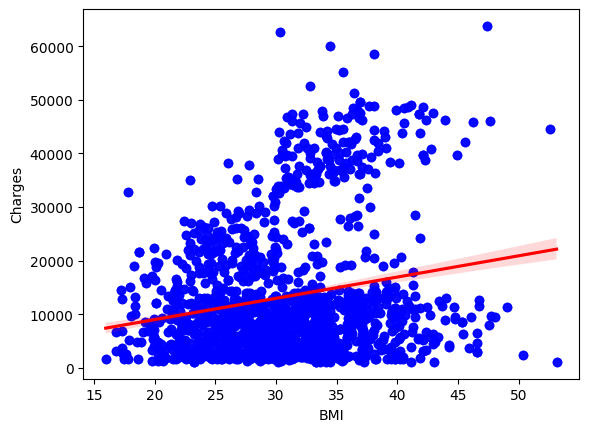

In [429]:
# Start here
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Implement the box plot for `charges` with respect to `smoker`.


C:\Users\User\AppData\Local\Temp\ipykernel_6440\2848947043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')


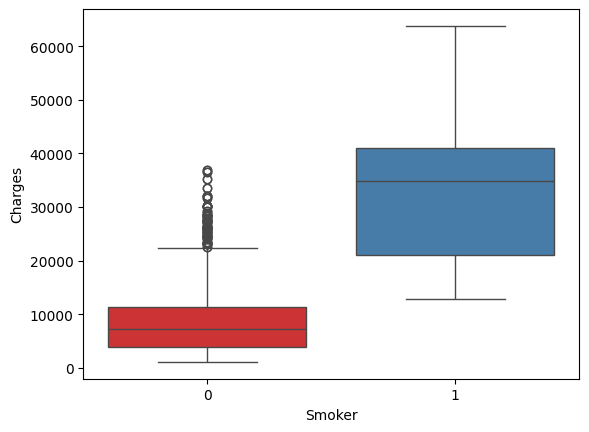

In [430]:
# Start here
sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')
# palette set màu cho khối
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Print the correlation matrix for the dataset.


In [431]:
# Start here
print(df.corr())

               age    gender       bmi  children    smoker    region   charges
age       1.000000 -0.026578  0.112855  0.037137 -0.022289 -0.006977  0.298890
gender   -0.026578  1.000000  0.042766  0.015693  0.083125  0.022360  0.062959
bmi       0.112855  0.042766  1.000000 -0.001642  0.011824  0.271200  0.199906
children  0.037137  0.015693 -0.001642  1.000000  0.007016 -0.025594  0.066551
smoker   -0.022289  0.083125  0.011824  0.007016  1.000000  0.053839  0.789141
region   -0.006977  0.022360  0.271200 -0.025594  0.053839  1.000000  0.054018
charges   0.298890  0.062959  0.199906  0.066551  0.789141  0.054018  1.000000


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [432]:
# Start here
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Chọn thuộc tính 'smoker' làm đặc trưng (X) và 'charges' làm mục tiêu (y)
X = df[['smoker']]  # Dữ liệu đầu vào
y = df['charges']   # Dữ liệu đầu ra

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tạo mô hình hồi quy tuyến tính và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá trị 'charges' từ tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán R^2 score
r2 = r2_score(y_test, y_pred)

# In R^2 score
print(f'R^2 score: {r2}')


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [154]:
# Start here


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [ ]:
# Start here

# Task 5 : Model Refinement

Split the data using all columns into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [ ]:
# Start here

Initialize a Ridge regressor (RidgeRegression) that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.

link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# Start here

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.

In [ ]:
# Start here

Similar to the previous task but using LassoRegression that used hyperparameter $ \alpha = 0.1 $

In [ ]:
# Start here

Which one is better, Ridge, Lasso or LinearRegression?

Question:
- Should we apply polynomial transformation prior to or following data splitting?
- Same question as above for the scaler transformation, for example StandardScaler?

------------------------------------------------------------

# 2. Tic-tac-toe game (optional)

Continue on with the tic-tac-toe game. In the previous homework, we've already built a function to help us check whether a board has a winner or not. In this part, we're going to develop complete game play.
- Create a blank board: ```[[0, 0, 0], [0, 0, 0], [0, 0, 0]]```
- Player 1 inputs the coordinates they want to play. Remember that the coordinate has to be in the format ROW, COL (starting from 1, not 0).
- When the player has finished entering the coordinates, print the entire board.
- Check the board's status to determine the winner. Print the announcement if any of the players are winning; otherwise, continue playing.
- When there are no more places to play or one of the two players wins, the game ends.

Ví dụ:
```
Người 1: 2, 2
Bàn cờ hiện tại: [[0, 0, 0], [0, 1, 0], [0, 0, 0]]
Người 2: 2, 1
Bàn cờ hiện tại: [[0, 0, 0], [2, 1, 0], [0, 0, 0]]
Người 1: 
...
Người 2: 1, 1
Bàn cờ hiện tại: [[2, 2, 0], [2, 1, 0], [2, 1, 1]]
Người thắng là người chơi số 2
```

Hint: làm sao để xoay vòng việc chơi game giữa 1 và 2 (mod hoặc các cách khác)

In [3]:
def check_winner(board):
    """Check trạng thái thắng từ ô bàn cờ.
    Nếu có người thắng thì return xâu Người thắng là ...
    Nếu không có ai thằng thì return ra None
    """
    if (board[0][0] == board[1][1] == board[2][2] != 0) | (board[0][2] == board[1][1] == board[2][0] != 0):  # check chéo
        return f"Người thắng là {board[1][1]}"

    for i in range(3):
        if board[0][i] == board[1][i] == board[2][i] != 0:  # check theo cột
            return f"Người thắng là {board[0][i]}"
        elif board[i][0] == board[i][1] == board[i][2] != 0:  # check theo hàng
            return f"Người thắng là {board[i][0]}"

In [4]:
# In ra bàn cờ hiện tại
def print_board(board):
    for row in board:
        print(row)

In [8]:
# Ý tưởng: 
## Cho user nhập tạo độ
## Check tọa độ đó đã có ai chơi chưa: nếu có thì cho nhập lại, nếu không thì đánh dấu vô board
## In ra board
## Check board
## Nếu có xâu người thắng thì in ra và break
## Nếu không tăng số ô đã đánh lên 1 và tiếp tục while
## Nếu vòng while stop tự nhiên do hết ô trống thì in ra Draw
def run_game():
    board = [[0, 0, 0] for _ in range(3)]  # bàn rỗng
    current_player = 1  # Khai báo người chơi, bắt đầu với người số 1 
    moves_made = 0  # Đếm số ô đã đánh

    while True:
        print(f"Người số {current_player}: Nhập tọa độ (row, col): ")
        row, col = map(int, input().split(','))

        # Kiểm tra xem tọa độ có hợp lệ không
        if row < 0 or row > 2 or col < 0 or col > 2:
            print("Tọa độ không hợp lệ. Vui lòng nhập lại.")
            continue

        # Kiểm tra xem ô đã có ai chơi chưa
        if board[row][col] != 0:
            print("Ô đã được đánh dấu. Vui lòng chọn ô khác.")
            continue

        # Đánh dấu ô và tăng số ô lên 1
        board[row][col] = current_player
        moves_made += 1
        print("Bàn cờ hiện tại:")
        print_board(board)

        # Chuyển lượt cho người chơi còn lại
        current_player = 2 if current_player == 1 else 1

        # Kiểm tra người thắng
        winner = check_winner(board)
        if winner:
            print(winner)
            break

        # Nếu vòng while stop tự nhiên do hết ô trống thì in ra Draw
        if moves_made == 9:
            print("Hòa!")
            break

run_game()        

Người số 1: Nhập tọa độ (row, col): 
Bàn cờ hiện tại:
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
Người số 2: Nhập tọa độ (row, col): 
Bàn cờ hiện tại:
[1, 0, 0]
[0, 0, 0]
[0, 2, 0]
Người số 1: Nhập tọa độ (row, col): 
Bàn cờ hiện tại:
[1, 0, 0]
[0, 1, 0]
[0, 2, 0]
Người số 2: Nhập tọa độ (row, col): 
Bàn cờ hiện tại:
[1, 0, 0]
[0, 1, 2]
[0, 2, 0]
Người số 1: Nhập tọa độ (row, col): 
Ô đã được đánh dấu. Vui lòng chọn ô khác.
Người số 1: Nhập tọa độ (row, col): 
Bàn cờ hiện tại:
[1, 0, 0]
[0, 1, 2]
[0, 2, 1]
Người thắng là 1
